<a href="https://colab.research.google.com/github/Rioba-Ian/Deep_Learning/blob/main/Deep_Learning_Heart_Disease_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Introduction
2.   Data desscription
3.   Loading the basic libraries
4.   Loading data
5.   Separating input and target varibales.
5. Splitting the input and target varibales
7.  Model building<br>

*  Model creation/ Definition 

> Model architechture 

* Model compilation 

> History 

* Model training 

* model evaluation 

> Model accuracy 

> Model loss

8. Conclusion


# Introduction 

<br>Classification is  apreocess of dividing the dat points into two or more classes. When there are two classes then, it is known as a binary classification problem. 
<br> We are going to Model the probability that a perosn has a heart disease or not. 
<br>
1. heart disease present = 1
2. Heart disease not present = 0

# Data description 

* *age* 
* sex, 1 = male, 0 = female 
* cp; Chest pain 
* trestbps; resting blood pressure in mm Hg
* chol: serum cholestrol in mg/dl
* fbs: fasting blood sugar > 120 mg/dl 1 = true, 0 = false

* restecg: resting electrocardiographic results
* thalach: maximum heart rate achieved 
* exang: exercise induced angina 1= yes, 0=no
* oldpeak: ST depression induced by exercise relative to rest 
* slope: slope of peak exercise ST segment 
* ca ; number of major vessels (0-3) colored by fuoroscopy
* thal: 3 = normal, 6 = fixed defect 7 = reversible defect 
* target : 1= heart disease present 0 = Heart disease not presnet


# Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


# Loading the data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/heart_disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Separating into train and test sets

In [5]:
X = df.drop('target', axis=1)
y = df['target']

We shall use a test size of 20% and 80% of the data will be used in training. 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(242, 13)

# Building the model <br>

We shall create a sequential model and then add layers one at a time until we are happy with out network architechture. We shall first begin by ensuring that our input layer has the right number of input features. We shall use a sigmoid activation function in the final layer of the network. 

In [8]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

## Model architechture

* Input = the n features are X_train =  13
* No of neurons/units in the first dense = 32
* No of neurons/ units in the second dense layer  = 16
* No of neurons/units in the third dense = 8
* No of neurons in the output layer = 1

<br> Actually deciding the no of hidden layers and no of neurons is a trial and error process. 

In [9]:
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Model compilation

In [10]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(0.001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In above, we compile the network. <br>
The loss function used is the binary_crossentropy. For ninary classification problems that give output in the from of probability, the binary crossentropy is used as the optimizer of choice. 
It uses the rmsprop as the optimizer
The learning rate of the optimizer is 0.001. <br>
Metrics is used to evaluate the model. 

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


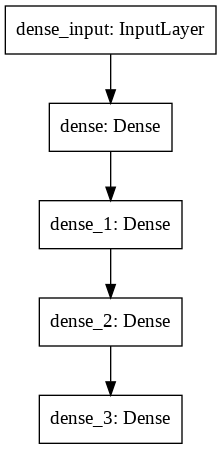

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model)

# Model training 
<br>
We have used 200 epochs initially, and a batch size of 10. 
<br>
The validation split is the farction of the training dataset which is used in the evaluation os the loss and model metrics on thsi data at the end of eah epoch. 

## History 
<br>
We shall enable history in order to be used for plotting in the future

In [13]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
20/20 [==============================] - 1s 30ms/step - loss: 4.9731 - accuracy: 0.4711 - val_loss: 0.9477 - val_accuracy: 0.4898
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 1.1809 - accuracy: 0.5463 - val_loss: 0.7973 - val_accuracy: 0.6735
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 1.1586 - accuracy: 0.5418 - val_loss: 0.5654 - val_accuracy: 0.6735
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.9598 - accuracy: 0.5978 - val_loss: 0.5412 - val_accuracy: 0.7755
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8739 - accuracy: 0.6424 - val_loss: 1.4819 - val_accuracy: 0.4694
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 0.9941 - accuracy: 0.6175 - val_loss: 2.0089 - val_accuracy: 0.4286
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 1.0669 - accuracy: 0.5823 - val_loss: 0.5493 - val_accuracy: 0.7551
Epoch 8/200


# Model evaluation

In [14]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.6229 - accuracy: 0.8033


[0.6229196786880493, 0.8032786846160889]

# Model accuracy 

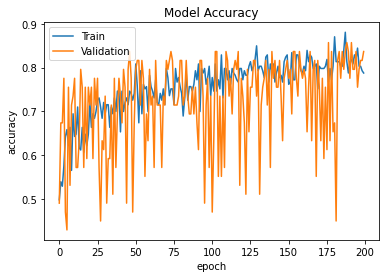

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Model Loss

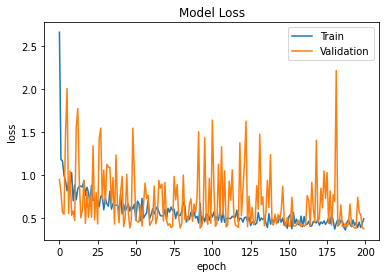

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()